## Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck

## Challenge

###  The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

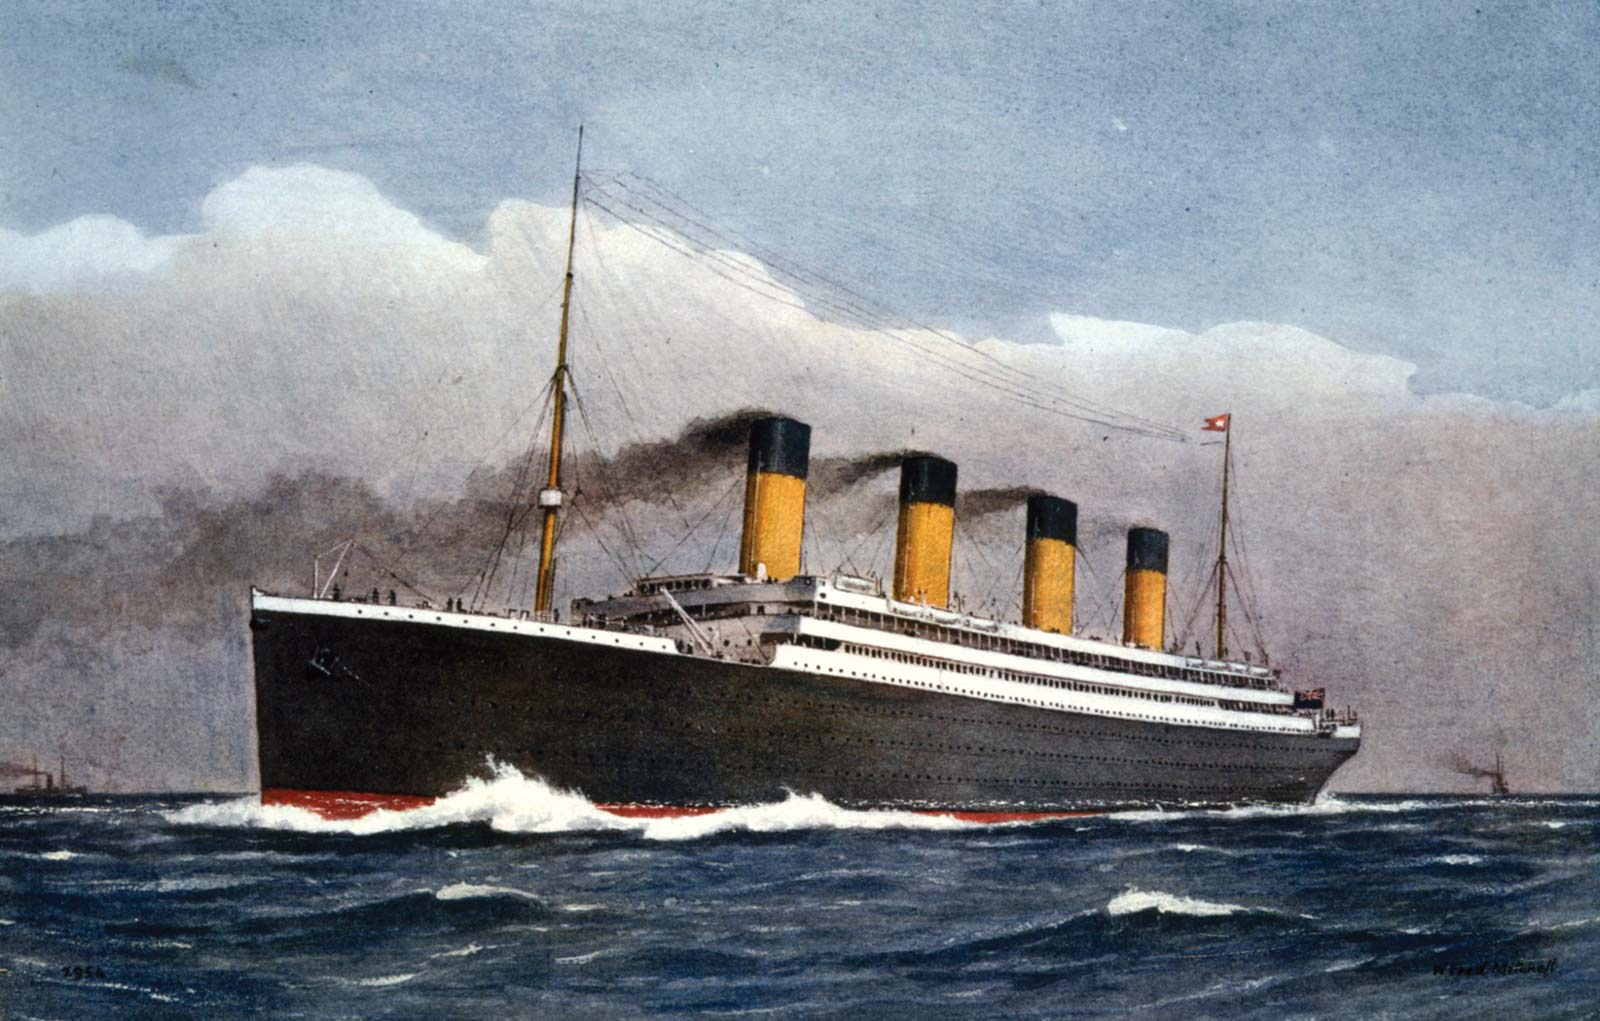

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df_train = df_train.set_index('PassengerId')
df_test = df_test.set_index('PassengerId')

In [5]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Null columns

Age,Cabin,Embarked

Age

In [7]:
df_train.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

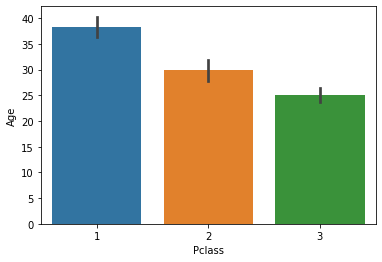

In [8]:
sns.barplot(x = df_train['Pclass'],y = df_train['Age'])

In [9]:
def applyage(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [10]:
df_train['Age']=df_train[['Age','Pclass']].apply(applyage,axis=1)

Cabin

In [11]:
def applyCabin(cols):
    Cabin = cols[0]
    if pd.isnull(Cabin):
        return "No cabin"
    else:
        return Cabin[0]

In [12]:
df_train['Cabin']=df_train[['Cabin']].apply(applyCabin,axis=1)

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

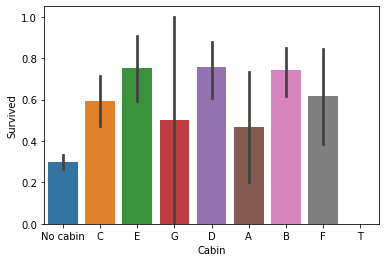

In [13]:
sns.barplot(x = df_train['Cabin'],y = df_train['Survived'])

In [14]:
df_train.groupby('Cabin')['Survived'].mean()

Cabin
A           0.466667
B           0.744681
C           0.593220
D           0.757576
E           0.750000
F           0.615385
G           0.500000
No cabin    0.299854
T           0.000000
Name: Survived, dtype: float64

In [15]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
le = preprocessing.LabelEncoder()

In [16]:
X = df_train['Cabin'].unique()

In [17]:
lst,lst1 = [],[]
for i in range(len(X)):
    x1 = df_train[(df_train['Cabin']==X[i]) & (df_train['Survived']==1)]
    y1 = df_train[(df_train['Cabin']==X[i])]
    lst.append(X[i])
    lst1.append(len(x1)/len(y1))    
print(lst,lst1)

['No cabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'] [0.29985443959243085, 0.5932203389830508, 0.75, 0.5, 0.7575757575757576, 0.4666666666666667, 0.7446808510638298, 0.6153846153846154, 0.0]


In [18]:
df = pd.DataFrame(list(zip(lst, lst1)),
               columns =['Cabin', 'Survived Mean'])

In [19]:
df['Cabin_new']=le.fit_transform(df['Cabin'])
df

,Cabin,Survived Mean,Cabin_new
0,No cabin,0.299854,7
1,C,0.593220,2
2,E,0.750000,4
3,G,0.500000,6
4,D,0.757576,3
5,A,0.466667,0
6,B,0.744681,1
7,F,0.615385,5
8,T,0.000000,8


In [20]:
import matplotlib.pyplot as plt

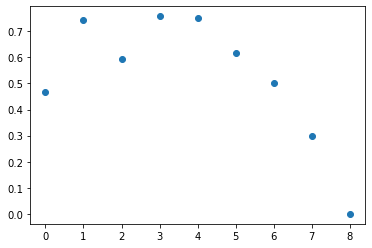

In [21]:
x = df['Cabin_new']
y = df['Survived Mean']
plt.scatter(x,y)

In [22]:
df1 = pd.DataFrame(list(zip(x, y)))
df1

,0,1
0,7,0.299854
1,2,0.593220
2,4,0.750000
3,6,0.500000
4,3,0.757576
5,0,0.466667
6,1,0.744681
7,5,0.615385
8,8,0.000000


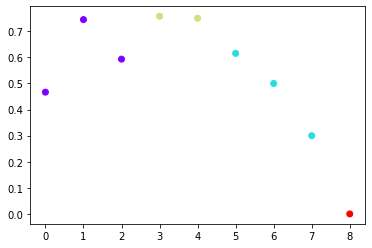

In [23]:
kmeans =KMeans(n_clusters = 4)
kmeans.fit(df1)
plt.scatter(x,y,c = kmeans.labels_,cmap='rainbow')

In [24]:
df['Cabin no']=kmeans.labels_
df

,Cabin,Survived Mean,Cabin_new,Cabin no
0,No cabin,0.299854,7,1
1,C,0.593220,2,0
2,E,0.750000,4,2
3,G,0.500000,6,1
4,D,0.757576,3,2
5,A,0.466667,0,0
6,B,0.744681,1,0
7,F,0.615385,5,1
8,T,0.000000,8,3


In [25]:
dict = {}
def dictionaryupdate(cols):
    Cabin = cols[0]
    Cabin_no = cols[1]
    dict[Cabin]=Cabin_no
df[['Cabin','Cabin no']].apply(dictionaryupdate,axis =1)    

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
dtype: object

In [26]:
def change(cols):
    Cabin = cols[0]
    return dict[Cabin]
df_train['Cabin']=df_train[['Cabin']].apply(change,axis=1)

In [27]:
df_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S


Embarked

In [28]:
most_freq = df_train['Embarked'].mode()[0]
df_train['Embarked']=df_train['Embarked'].replace(np.nan,most_freq)

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    int64  
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


## We have already handled null values
# Now let's gather info from not null columns

Name

In [30]:
df_train['Name'].head(3)

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
Name: Name, dtype: object

So we can find initials from their name

In [31]:
import re

In [32]:
def findinitial(cols):
    Name = cols[0]
    regex = "\\,(.*?)\\."
    Name = re.findall(regex, Name)
    Name = str(Name)
    Name = Name.replace(' ','').replace("['",'').replace("']",'')
    if(Name=='Mlle'):
        Name = 'Miss'
    if(Name == 'Mme'):
        Name = 'Mrs'
    return Name
df_train['Initial']=df_train[['Name']].apply(findinitial,axis=1)

In [33]:
df_train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Ms', 'Major',
       'Lady', 'Sir', 'Col', 'Capt', 'theCountess', 'Jonkheer'],
      dtype=object)

In [34]:
initial = ['Mr','Mrs','Miss','Master']
def changeinitial(cols):
    Initial = cols[0]
    if Initial not in initial:
        return 'Others'
    else:
        return Initial

In [35]:
df_train['Initial'] = df_train[['Initial']].apply(changeinitial,axis =1)

In [36]:
df_train.groupby('Initial')['Survived'].count()

Initial
Master     40
Miss      184
Mr        517
Mrs       126
Others     24
Name: Survived, dtype: int64

In [37]:
df_train.groupby('Initial')['Survived'].mean()

Initial
Master    0.575000
Miss      0.701087
Mr        0.156673
Mrs       0.793651
Others    0.375000
Name: Survived, dtype: float64

In [38]:
df_train.drop(['Name'],axis = 1,inplace = True)

In [39]:
df_train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.25,1,S,Mr


Ticket

We can collect ticket prefix from ticket number

In [40]:
def prefix(cols):
    Ticket = cols[0]
    if Ticket.isdigit():
        return 'no prefix'
    else:
        Ticket = Ticket.replace('.','').replace('/','').split(' ')[0]
        return Ticket
df_train['ticket_prefix']=df_train[['Ticket']].apply(prefix,axis=1)    

In [41]:
df_train.drop(['Ticket'],inplace = True, axis =1)

[Text(0, 0, 'A5'),
 Text(1, 0, 'PC'),
 Text(2, 0, 'STONO2'),
 Text(3, 0, 'no prefix'),
 Text(4, 0, 'PP'),
 Text(5, 0, 'CA'),
 Text(6, 0, 'SCParis'),
 Text(7, 0, 'SCA4'),
 Text(8, 0, 'A4'),
 Text(9, 0, 'SP'),
 Text(10, 0, 'SOC'),
 Text(11, 0, 'WC'),
 Text(12, 0, 'SOTONOQ'),
 Text(13, 0, 'WEP'),
 Text(14, 0, 'STONO'),
 Text(15, 0, 'C'),
 Text(16, 0, 'SCPARIS'),
 Text(17, 0, 'SOP'),
 Text(18, 0, 'Fa'),
 Text(19, 0, 'LINE'),
 Text(20, 0, 'FCC'),
 Text(21, 0, 'SWPP'),
 Text(22, 0, 'SCOW'),
 Text(23, 0, 'PPP'),
 Text(24, 0, 'SC'),
 Text(25, 0, 'SCAH'),
 Text(26, 0, 'AS'),
 Text(27, 0, 'SOPP'),
 Text(28, 0, 'FC'),
 Text(29, 0, 'SOTONO2'),
 Text(30, 0, 'CASOTON')]

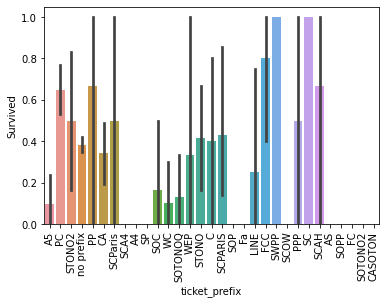

In [42]:
ax = sns.barplot(x = df_train['ticket_prefix'],y = df_train['Survived'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [43]:
df_train.groupby('ticket_prefix')['Survived'].count()

ticket_prefix
A4             7
A5            21
AS             1
C              5
CA            41
CASOTON        1
FC             1
FCC            5
Fa             1
LINE           4
PC            60
PP             3
PPP            2
SC             1
SCA4           1
SCAH           3
SCOW           1
SCPARIS        7
SCParis        4
SOC            6
SOP            1
SOPP           3
SOTONO2        2
SOTONOQ       15
SP             1
STONO         12
STONO2         6
SWPP           2
WC            10
WEP            3
no prefix    661
Name: Survived, dtype: int64

In [44]:
X = df_train.groupby('ticket_prefix').mean()['Survived']
# count per label
Y = df_train.groupby('ticket_prefix').count()['Survived']

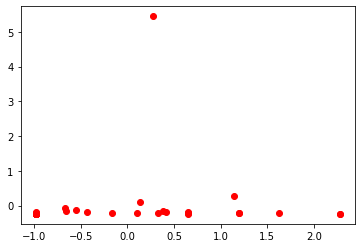

                      X         Y  label
ticket_prefix                           
A4            -0.982387 -0.187279      2
A5            -0.671617 -0.066687      2
AS            -0.982387 -0.238961      2
C              0.322849 -0.204506      0
CA             0.131839  0.105587      0
CASOTON       -0.982387 -0.238961      2
FC            -0.982387 -0.238961      2
FCC            1.628085 -0.204506      0
Fa            -0.982387 -0.238961      2
LINE          -0.166615 -0.213120      2
PC             1.138622  0.269248      0
PP             1.193006 -0.221734      0
PPP            0.649158 -0.230347      0
SC             2.280703 -0.238961      0
SCA4          -0.982387 -0.238961      2
SCAH           1.193006 -0.221734      0
SCOW          -0.982387 -0.238961      2
SCPARIS        0.416080 -0.187279      0
SCParis        0.649158 -0.213120      0
SOC           -0.438539 -0.195893      2
SOP           -0.982387 -0.238961      2
SOPP          -0.982387 -0.221734      2
SOTONO2       -0

In [45]:
X = (X - np.mean(X))/np.std(X)
Y = (Y - np.mean(Y))/np.std(Y)

array = np.array([[X[i], Y[i]] for i in range(len(X))])
plt.plot(X,Y, 'ro')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0).fit(array)
df_clusters = pd.DataFrame(array, columns = ['X', 'Y'])
df_clusters['label'] = kmeans.labels_
df_clusters.index = df_train.groupby('ticket_prefix').mean().index
print(df_clusters)

In [46]:
mapping_dict = {}

list_cat = df_train.groupby('ticket_prefix').mean().index
list_label = kmeans.labels_

for i in range(len(list_cat)):
    mapping_dict[list_cat[i]] = list_label[i]

df_train.ticket_prefix = df_train.ticket_prefix.map(mapping_dict)
df_train.groupby('ticket_prefix').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
ticket_prefix,,,,,,,
0,0.525974,1.902597,31.214286,0.870130,0.538961,62.352732,0.876623
1,0.384266,2.347958,28.957141,0.470499,0.364599,27.130899,0.945537
2,0.092105,2.789474,27.993421,0.276316,0.210526,15.238212,1.013158


In [47]:
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Initial,ticket_prefix
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,1,S,Mr,2
2,1,1,female,38.0,1,0,71.2833,0,C,Mrs,0
3,1,3,female,26.0,0,0,7.9250,1,S,Miss,0


Parch and SibSp

In [48]:
df_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [49]:
df_train.groupby('Parch')['Survived'].count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

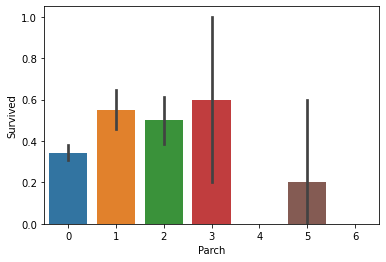

In [50]:
sns.barplot(x=df_train['Parch'],y=df_train['Survived'])

In [51]:
df_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [52]:
df_train.groupby('SibSp')['Survived'].count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

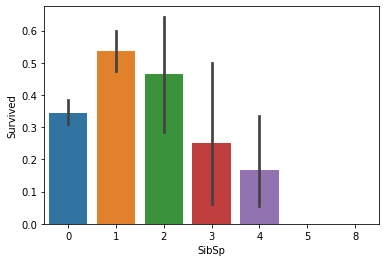

In [53]:
sns.barplot(x=df_train['SibSp'],y=df_train['Survived'])

In [54]:
def familymembers(cols):
    Parch = cols[0]
    SibSp = cols[1]
    return Parch + SibSp
df_train['no_of_members'] = df_train[['Parch','SibSp']].apply(familymembers,axis=1)

In [55]:
df_train.groupby('no_of_members')['Survived'].count()

no_of_members
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Survived, dtype: int64

In [56]:
df_train.groupby('no_of_members')['Survived'].mean()

no_of_members
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [57]:
def familyclass(cols):
    number = cols[0]
    if number == 0:
        return 'alone'
    elif number>=1 and number<=3:
        return 'small_to_moderate family'
    elif number>=4 and number<=6:
        return 'big family'
    else:
        return 'very big family'
    

In [58]:
df_train['family_class']=df_train[['no_of_members']].apply(familyclass,axis=1)

In [59]:
df_train.drop(['no_of_members','Parch','SibSp'],axis=1,inplace=True)

In [60]:
df_train.head(3)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,ticket_prefix,family_class
PassengerId,,,,,,,,,,
1,0,3,male,22.0,7.2500,1,S,Mr,2,small_to_moderate family
2,1,1,female,38.0,71.2833,0,C,Mrs,0,small_to_moderate family
3,1,3,female,26.0,7.9250,1,S,Miss,0,alone


Fare

<AxesSubplot:xlabel='Fare', ylabel='Count'>

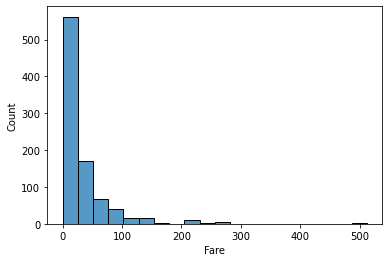

In [61]:
sns.histplot(df_train['Fare'],bins=20)

In [62]:
def fare(cols):
    Fare=cols[0]
    if Fare>=0 and Fare<=50:
        return 'Very Cheap'
    elif Fare>50 and Fare<=100:
        return 'Cheap'
    elif Fare>100 and Fare<=150:
        return 'Moderate'
    elif Fare>150 and Fare<300:
        return 'Expensive'
    else:
        return 'Very Expensive'
df_train['fare']=df_train[['Fare']].apply(fare,axis=1)    

Age

<AxesSubplot:ylabel='Density'>

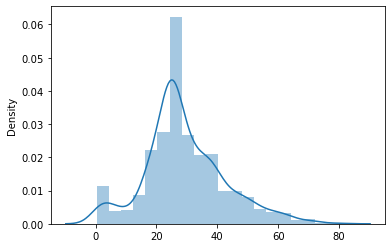

In [63]:
sns.distplot(x=df_train['Age'],bins=20)

In [64]:
def agegroup(cols):
    Age=cols[0]
    if Age>=0 and Age<=1:
        return 'Infant'
    elif Age>=2 and Age<=3:
        return 'Toddler'
    elif Age>=5 and Age<=12:
        return 'Child'
    elif Age>=13 and Age<=19:
        return 'Teen'
    elif Age>=20 and Age<=59:
        return 'Adult'
    else :
        return 'Old'

In [65]:
df_train['agelabel']=df_train[['Age']].apply(agegroup,axis=1)

In [66]:
df_train.groupby('agelabel')['Survived'].mean()

agelabel
Adult      0.365193
Child      0.448276
Infant     0.857143
Old        0.388889
Teen       0.410526
Toddler    0.500000
Name: Survived, dtype: float64

In [67]:
df_train.drop(['Fare','Age'],axis=1,inplace=True)

## Processing my data

In [68]:
columns=['family_class','fare','agelabel','Initial']

df_train[columns] = df_train[columns].apply(le.fit_transform)

In [69]:
df_train = pd.get_dummies(df_train,columns=['Sex','Embarked'])

In [70]:
df_train.head(3)

,Survived,Pclass,Cabin,Initial,ticket_prefix,family_class,fare,agelabel,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,3,1,2,2,2,3,0,0,1,0,0,1
2,1,1,0,3,0,2,0,0,1,0,1,0,0
3,1,3,1,1,0,0,3,0,1,0,0,0,1


### Fixing X and Y 

In [71]:
Y=df_train.Survived
df_train.drop(['Survived'],axis=1,inplace=True)

In [72]:
X=df_train

## Normalizing data

In [73]:
for column in df_train.columns:
    df_train[column] = df_train[column]  / df_train[column].abs().max()

In [74]:
df_train.head(3)

,Pclass,Cabin,Initial,ticket_prefix,family_class,fare,agelabel,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,1.000000,0.333333,0.50,1.0,0.666667,0.75,0.0,0.0,1.0,0.0,0.0,1.0
2,0.333333,0.000000,0.75,0.0,0.666667,0.00,0.0,1.0,0.0,1.0,0.0,0.0
3,1.000000,0.333333,0.25,0.0,0.000000,0.75,0.0,1.0,0.0,0.0,0.0,1.0


Train Test Split

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
print("Size of x_train : ",x_train.shape)
print("Size of y_train : ",y_train.shape)
print("Size of x_test : ",x_test.shape)
print("Size of y_test : ",y_test.shape)

Size of x_train :  (623, 12)
Size of y_train :  (623,)
Size of x_test :  (268, 12)
Size of y_test :  (268,)


# Applying ML algorithms

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Accuracy Measures

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [78]:
measures = {}

## Logistic Regression

In [79]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))
print(confusion_matrix(y_test, y_pred))
measures['Logistic Regression'] = accuracy*100

Accuracy : 75.75
[[127  26]
 [ 39  76]]


## K Neighbors Classifier 

In [80]:
clf = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))
print(confusion_matrix(y_test, y_pred))

Accuracy : 74.25
[[129  24]
 [ 45  70]]


In [81]:
measures['KNeighborsClassifier'] = accuracy*100

## Decision Tree

In [82]:
tree_classifier = DecisionTreeClassifier(max_depth = 5)
tree_classifier.fit(x_train,y_train)
y_pred = tree_classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))
print(confusion_matrix(y_test, y_pred))
measures['Decision Tree'] = accuracy*100

Accuracy : 78.73
[[141  12]
 [ 45  70]]


## Random Forest

In [83]:
rf = RandomForestClassifier(random_state = 42,n_jobs = -1,max_depth = 5,n_estimators = 100)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
aaccuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))
print(confusion_matrix(y_test, y_pred))
measures['Random Forest'] = accuracy*100

Accuracy : 78.73
[[138  15]
 [ 42  73]]


## Support Vector Machine

In [84]:
clf = SVC(kernel='linear', C = 1.0)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))
print(confusion_matrix(y_test, y_pred))
measures['Support Vector Machine'] = accuracy*100

Accuracy : 75.37
[[129  24]
 [ 42  73]]


## Gaussian NB

In [85]:
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy : {:.2f}".format(accuracy*100))
print(confusion_matrix(y_test, y_pred))
measures['Gaussian NB'] = accuracy*100

Accuracy : 75.00
[[111  42]
 [ 25  90]]


## Linear Discriminant Analysis

In [86]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_pred = lda.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy : {:.2f}".format(accuracy*100))
print(confusion_matrix(y_test, y_pred))
measures['Linear Discriminant Analysis'] = accuracy*100

Accuracy : 74.63
[[123  30]
 [ 38  77]]


## Ada Boost 

In [87]:
abclf = AdaBoostClassifier(n_estimators = 50,learning_rate = 1)
abclf.fit(x_train,y_train)
y_pred = abclf.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy : {:.2f}".format(accuracy*100))
print(confusion_matrix(y_test, y_pred))
measures['Ada Boost'] = accuracy*100

Accuracy : 79.10
[[127  26]
 [ 30  85]]


## Gradient Boosting

In [88]:
gbclf = GradientBoostingClassifier(n_estimators = 50)
gbclf.fit(x_train,y_train)
y_pred = gbclf.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy : {:.2f}".format(accuracy*100))
print(confusion_matrix(y_test, y_pred))
measures['Gradiebt Boosting'] = accuracy*100

Accuracy : 79.85
[[138  15]
 [ 39  76]]


## XG Boost

In [89]:
xgb=XGBClassifier(n_estimators=50)
xgb.fit(x_train,y_train)
y_predict = xgb.predict(x_test)
accuracy = accuracy_score(y_predict,y_test)
print("Accuracy : {:.2f}".format(accuracy*100))
print(confusion_matrix(y_test, y_pred))
measures['XG Boost'] = accuracy*100

Accuracy : 76.12
[[138  15]
 [ 39  76]]


In [90]:
data = pd.DataFrame({'Classifiers':measures.keys(), 'accuracy':measures.values()})

In [91]:
data

,Classifiers,accuracy
0,Logistic Regression,75.746269
1,KNeighborsClassifier,74.253731
2,Decision Tree,78.731343
3,Random Forest,78.731343
4,Support Vector Machine,75.373134
5,Gaussian NB,75.000000
6,Linear Discriminant Analysis,74.626866
7,Ada Boost,79.104478
8,Gradiebt Boosting,79.850746
9,XG Boost,76.119403


<AxesSubplot:xlabel='accuracy', ylabel='Classifiers'>

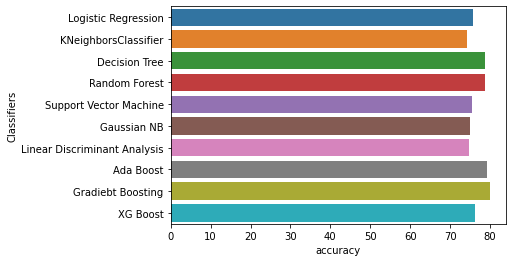

In [92]:
sns.barplot(x=data['accuracy'],y=data['Classifiers'])

# As we can se Decision Tree, Random Forest, Gradient Boosting and Ada Boost is giving best results so we can hypertune the parameters for these algorithms

### Decision Tree 

In [93]:
dt = DecisionTreeClassifier()
params = {
    'criterion':["gini","entropy"],
    'max_depth' : range(1,100),
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,12,15,17,18,19,20],
    'min_samples_split':[1,2,3,4,5,6,7,8,9,10,12,15,17,18,19,20]
}
grid_search = GridSearchCV(estimator = dt,param_grid = params,cv = 3,n_jobs = -1,verbose = 1,scoring = "accuracy")
grid_search.fit(x_train,y_train)

print(grid_search.best_score_)
dt_best = grid_search.best_params_
print(dt_best)

Fitting 3 folds for each of 50688 candidates, totalling 152064 fits
0.8587343614517527
{'criterion': 'gini', 'max_depth': 87, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Random forest

In [94]:
rf = RandomForestClassifier()
params ={
    'max_depth':range(1,100),
    'min_samples_leaf':[5,10,20,50,100,150,200],
    'n_estimators':[10,25,30,50,100,200]
}
grid_search = GridSearchCV(estimator = rf,param_grid = params,cv = 3,n_jobs = -1,verbose = 1,scoring = "accuracy")
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
rf_best = grid_search.best_params_
print(rf_best)

Fitting 3 folds for each of 4158 candidates, totalling 12474 fits
0.8523086213303603
{'max_depth': 26, 'min_samples_leaf': 5, 'n_estimators': 25}


### Gradient Boosting 

In [95]:
gbclf = GradientBoostingClassifier()
params = {'n_estimators':range(1,100)}
grid_search = GridSearchCV(estimator = gbclf, param_grid = params, scoring='accuracy',n_jobs=-1, cv=3,verbose = 1)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
gb_best = grid_search.best_params_
print(gb_best)

Fitting 3 folds for each of 99 candidates, totalling 297 fits
0.8667858912424129
{'n_estimators': 47}


In [96]:
params = {'max_depth':range(1,20), 'min_samples_split':range(1,1000)}
gbclf = GradientBoostingClassifier(n_estimators = 32)
grid_search = GridSearchCV(estimator = gbclf, param_grid = params, scoring='accuracy',n_jobs=-1, cv=3,verbose = 1)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
gb_best = grid_search.best_params_
print(gb_best)

Fitting 3 folds for each of 18981 candidates, totalling 56943 fits
0.866778149386845
{'max_depth': 6, 'min_samples_split': 28}


In [97]:
gbclf = GradientBoostingClassifier(n_estimators = 32,max_depth = 3,min_samples_split = 9)
params = {
    'min_samples_leaf':range(1,100),
    'max_features':range(1,20)
}
grid_search = GridSearchCV(estimator = gbclf, param_grid = params, scoring='accuracy',n_jobs=-1, cv=3,verbose = 1)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
gb_best = grid_search.best_params_
print(gb_best)

Fitting 3 folds for each of 1881 candidates, totalling 5643 fits
0.8683729716338412
{'max_features': 12, 'min_samples_leaf': 2}


### AdaBoost

In [98]:
abclf = AdaBoostClassifier()
params = {
    'n_estimators':range(1,100),
    'learning_rate':[0.0001,0.001,0.01,0.1,1.0]
}
grid_search = GridSearchCV(estimator = abclf, param_grid = params, scoring='accuracy',n_jobs=-1, cv=3,verbose = 1)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
ab_best = grid_search.best_params_
print(ab_best)

Fitting 3 folds for each of 495 candidates, totalling 1485 fits
0.8411293818902514
{'learning_rate': 1.0, 'n_estimators': 21}


In [99]:
abclf = AdaBoostClassifier(n_estimators = 28,learning_rate = 1.0)
params = {
    'algorithm':['SAMME','SAMME.R']     
}
grid_search = GridSearchCV(estimator = abclf, param_grid = params, scoring='accuracy',n_jobs=-1, cv=3,verbose = 1)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
ab_best = grid_search.best_params_
print(ab_best)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
0.8379087699739873
{'algorithm': 'SAMME.R'}


## XG Boost

In [100]:
params = {
    'max_depth' : range(1,10,1),
    'min_child_weight':range(1,10,1),
}
grid_search = GridSearchCV(estimator = XGBClassifier(),param_grid = params, scoring = 'accuracy',n_jobs = -1,verbose = 1,cv = 3)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
xg_best = grid_search.best_params_
print(xg_best)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
0.8587343614517527
{'max_depth': 5, 'min_child_weight': 6}


In [101]:
params = {    
    'gamma':[i/10.0 for i in range(0,10)],
    'subsample':[i/10.0 for i in range(1,10)],
    'colsample_bytree':[i/10.0 for i in range(1,10)],
    'reg_alpha':[1e-5,1e-2,0.1,1,100,0,0.001,0.005,0.05],
    'learning_rate':[0.0001,0.001,0.01,0.1,1]
}
grid_search = GridSearchCV(estimator = XGBClassifier(max_depth = 4,min_child_weight = 6),param_grid = params, scoring = 'accuracy',n_jobs = -1,verbose = 1,cv = 3)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
xg_best = grid_search.best_params_
print(xg_best)

Fitting 3 folds for each of 36450 candidates, totalling 109350 fits
0.8571317973491887
{'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 1, 'reg_alpha': 1, 'subsample': 0.9}


#### So GradientBoostingClassifier and XGBoost Classifier is giving best result after hyperparameter tuning

In [102]:
df_test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [103]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


## Null columns

Age,Fare,Cabin

Age

In [104]:
df_test.groupby(['Pclass'])['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

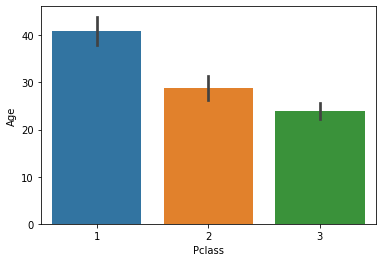

In [105]:
sns.barplot(x = df_test['Pclass'],y = df_test['Age'])

In [106]:
def applyage(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [107]:
df_test['Age']=df_test[['Age','Pclass']].apply(applyage,axis=1)

Cabin

In [108]:
def applyCabin(cols):
    Cabin = cols[0]
    if pd.isnull(Cabin):
        return "No cabin"
    else:
        return Cabin[0]

In [109]:
df_test['Cabin']=df_test[['Cabin']].apply(applyCabin,axis=1)

In [110]:
dict

{'No cabin': 1, 'C': 0, 'E': 2, 'G': 1, 'D': 2, 'A': 0, 'B': 0, 'F': 1, 'T': 3}

In [111]:
def change(cols):
    Cabin = cols[0]
    return dict[Cabin]
df_test['Cabin']=df_test[['Cabin']].apply(change,axis=1)

Fare

In [112]:
mean_fare = df_test['Fare'].mean()
df_test['Fare']=df_test['Fare'].replace(np.nan,mean_fare)

In [113]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    int64  
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.9+ KB


## Now let's gather info from not null columns

Name

In [114]:
df_test['Name'].head(3)

PassengerId
892                    Kelly, Mr. James
893    Wilkes, Mrs. James (Ellen Needs)
894           Myles, Mr. Thomas Francis
Name: Name, dtype: object

In [115]:
import re

In [116]:
def findinitial(cols):
    Name = cols[0]
    regex = "\\,(.*?)\\."
    Name = re.findall(regex, Name)
    Name = str(Name)
    Name = Name.replace(' ','').replace("['",'').replace("']",'')
    if(Name=='Mlle'):
        Name = 'Miss'
    if(Name == 'Mme'):
        Name = 'Mrs'
    return Name
df_test['Initial']=df_test[['Name']].apply(findinitial,axis=1)

In [117]:
df_test['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [118]:
initial = ['Mr','Mrs','Miss','Master']
def changeinitial(cols):
    Initial = cols[0]
    if Initial not in initial:
        return 'Others'
    else:
        return Initial

In [119]:
df_test['Initial'] = df_test[['Initial']].apply(changeinitial,axis =1)

In [120]:
df_test.drop(['Name'],axis = 1,inplace = True)

In [121]:
df_test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
PassengerId,,,,,,,,,,
892,3,male,34.5,0,0,330911,7.8292,1,Q,Mr


In [122]:
mapping_dict

{'A4': 2,
 'A5': 2,
 'AS': 2,
 'C': 0,
 'CA': 0,
 'CASOTON': 2,
 'FC': 2,
 'FCC': 0,
 'Fa': 2,
 'LINE': 2,
 'PC': 0,
 'PP': 0,
 'PPP': 0,
 'SC': 0,
 'SCA4': 2,
 'SCAH': 0,
 'SCOW': 2,
 'SCPARIS': 0,
 'SCParis': 0,
 'SOC': 2,
 'SOP': 2,
 'SOPP': 2,
 'SOTONO2': 2,
 'SOTONOQ': 2,
 'SP': 2,
 'STONO': 0,
 'STONO2': 0,
 'SWPP': 0,
 'WC': 2,
 'WEP': 0,
 'no prefix': 1}

In [123]:
def prefix(cols):
    Ticket = cols[0]
    if Ticket.isdigit():
        return 'no prefix'
    else:
        Ticket = Ticket.replace('.','').replace('/','').split(' ')[0]
        return Ticket
df_test['ticket_prefix']=df_test[['Ticket']].apply(prefix,axis=1)

In [124]:
df_test['ticket_prefix'].unique()

array(['no prefix', 'A4', 'WEP', 'SCPARIS', 'STONO2', 'PC', 'C', 'A5',
       'SCAH', 'CA', 'WC', 'SOTONOQ', 'STONO', 'SCA3', 'FCC', 'FC', 'PP',
       'STONOQ', 'SCA4', 'SOPP', 'SOC', 'SOTONO2', 'AQ4', 'A', 'SC',
       'SCParis', 'LP', 'AQ3'], dtype=object)

In [125]:
def prefixconversion(cols):
    ticket_prefix = cols[0]
    if ticket_prefix in mapping_dict:
        return mapping_dict[ticket_prefix]
    else:
        return 0
df_test['ticket_prefix']=df_test[['ticket_prefix']].apply(prefixconversion,axis=1)    

In [126]:
df_test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,ticket_prefix
PassengerId,,,,,,,,,,,
892,3,male,34.5,0,0,330911,7.8292,1,Q,Mr,1


Parch and SibSp

In [127]:
def familymembers(cols):
    Parch = cols[0]
    SibSp = cols[1]
    return Parch + SibSp
df_test['no_of_members'] = df_test[['Parch','SibSp']].apply(familymembers,axis=1)

In [128]:
def familyclass(cols):
    number = cols[0]
    if number == 0:
        return 'alone'
    elif number>=1 and number<=3:
        return 'small_to_moderate family'
    elif number>=4 and number<=6:
        return 'big family'
    else:
        return 'very big family'
df_test['family_class']=df_test[['no_of_members']].apply(familyclass,axis=1)    

In [129]:
df_test.drop(['no_of_members','Parch','SibSp'],axis=1,inplace=True)

In [130]:
df_test.head(1)

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,ticket_prefix,family_class
PassengerId,,,,,,,,,,
892,3,male,34.5,330911,7.8292,1,Q,Mr,1,alone


Fare

<AxesSubplot:xlabel='Fare', ylabel='Count'>

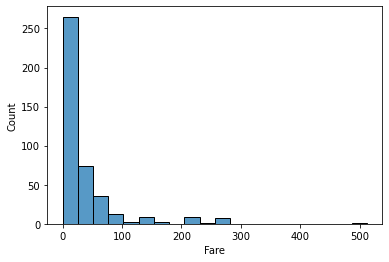

In [131]:
sns.histplot(df_test['Fare'],bins=20)

In [132]:
def fare(cols):
    Fare=cols[0]
    if Fare>=0 and Fare<=50:
        return 'Very Cheap'
    elif Fare>50 and Fare<=100:
        return 'Cheap'
    elif Fare>100 and Fare<=150:
        return 'Moderate'
    elif Fare>150 and Fare<300:
        return 'Expensive'
    else:
        return 'Very Expensive'
df_test['fare']=df_test[['Fare']].apply(fare,axis=1)    

Age

<AxesSubplot:ylabel='Density'>

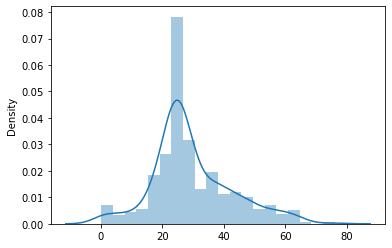

In [133]:
sns.distplot(x=df_test['Age'],bins=20)

In [134]:
def agegroup(cols):
    Age=cols[0]
    if Age>=0 and Age<=1:
        return 'Infant'
    elif Age>=2 and Age<=3:
        return 'Toddler'
    elif Age>=5 and Age<=12:
        return 'Child'
    elif Age>=13 and Age<=19:
        return 'Teen'
    elif Age>=20 and Age<=59:
        return 'Adult'
    else :
        return 'Old'
df_test['agelabel']=df_test[['Age']].apply(agegroup,axis=1)    

In [135]:
df_test.drop(['Fare','Age'],axis=1,inplace=True)

In [136]:
df_test.drop(['Ticket'],axis=1,inplace=True)

In [137]:
df_test.head(2)

,Pclass,Sex,Cabin,Embarked,Initial,ticket_prefix,family_class,fare,agelabel
PassengerId,,,,,,,,,
892,3,male,1,Q,Mr,1,alone,Very Cheap,Adult
893,3,female,1,S,Mrs,1,small_to_moderate family,Very Cheap,Adult


# Processing my data

In [138]:
columns=['family_class','fare','agelabel','Initial']

df_test[columns] = df_test[columns].apply(le.fit_transform)

In [139]:
df_test = pd.get_dummies(df_test,columns=['Sex','Embarked'])

In [140]:
df_test.head(3)

,Pclass,Cabin,Initial,ticket_prefix,family_class,fare,agelabel,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
892,3,1,2,1,0,3,0,0,1,0,1,0
893,3,1,3,1,2,3,0,1,0,0,0,1
894,2,1,2,1,0,3,3,0,1,0,1,0


## Fixing X 

In [141]:
X=df_test

## Normalizing data

In [142]:
for column in df_test.columns:
    df_test[column] = df_test[column]  / df_test[column].abs().max()

In [143]:
df_test.head(3)

,Pclass,Cabin,Initial,ticket_prefix,family_class,fare,agelabel,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
892,1.000000,0.5,0.50,0.5,0.000000,0.75,0.0,0.0,1.0,0.0,1.0,0.0
893,1.000000,0.5,0.75,0.5,0.666667,0.75,0.0,1.0,0.0,0.0,0.0,1.0
894,0.666667,0.5,0.50,0.5,0.000000,0.75,0.6,0.0,1.0,0.0,1.0,0.0


## Predicting for x_test

Submission 1

In [144]:
gbc = GradientBoostingClassifier(n_estimators = 32,max_depth = 3,min_samples_split = 9, max_features = 12 ,min_samples_leaf = 2)
gbc.fit(x_train,y_train)
y_predict = gbc.predict(df_test)
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Submission 2

In [145]:
xgb = XGBClassifier(max_depth = 4, min_child_weight = 6,colsample_bytree =0.9, gamma = 0.5, learning_rate = 1,reg_alpha = 0.1, subsample = 0.9)
xgb.fit(x_train,y_train)
y_predict1 = xgb.predict(df_test)
y_predict1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [146]:
df_test = df_test.reset_index()

In [147]:
df_test.head()

,PassengerId,Pclass,Cabin,Initial,ticket_prefix,family_class,fare,agelabel,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,1.000000,0.5,0.50,0.5,0.000000,0.75,0.0,0.0,1.0,0.0,1.0,0.0
1,893,1.000000,0.5,0.75,0.5,0.666667,0.75,0.0,1.0,0.0,0.0,0.0,1.0
2,894,0.666667,0.5,0.50,0.5,0.000000,0.75,0.6,0.0,1.0,0.0,1.0,0.0
3,895,1.000000,0.5,0.50,0.5,0.000000,0.75,0.0,0.0,1.0,0.0,0.0,1.0
4,896,1.000000,0.5,0.75,0.5,0.666667,0.75,0.0,1.0,0.0,0.0,0.0,1.0


In [148]:
test_pred = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_predict1}, columns = ['PassengerId','Survived'] )

In [149]:
test_pred = test_pred.set_index('PassengerId')

In [150]:
test_pred.head(3)

,Survived
PassengerId,
892,0
893,0
894,0


In [151]:
test_pred.to_csv("gender_submission.csv")

In [152]:
test_pred.shape

(418, 1)